In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy as ap
import pandas as pd
import scipy as sp
from matplotlib.ticker import ScalarFormatter
import time

In [2]:
# Define column names manually, since header is being skipped
colnames = [
    "JD", 
    "Relative_Magnitude", 
    "Relative_Magnitude_Uncertainty", 
    "Accepted"
]

# Read file starting from line 130 (index 129), using whitespace separator
data = pd.read_csv(
    "UID_0108859_PLC_016.tbl.txt", 
    skiprows=130, 
    delim_whitespace=True, 
    names=colnames,
    engine='python'
)

# Extract columns
x_data = data["JD"]
y_data = data["Relative_Magnitude"]
acc_data = data["Accepted"]

/var/folders/k7/w67xg85s61d9mbvptn_y3w3c0000gn/T/ipykernel_12125/3986657770.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(


In [3]:
##Data reduction and coonversion in the numpy array
st_idx, end_idx = 45000, 120000             ##Index to select a specific time period

x = x_data[st_idx:end_idx].to_numpy()
y = np.exp(-y_data[st_idx:end_idx]).to_numpy()

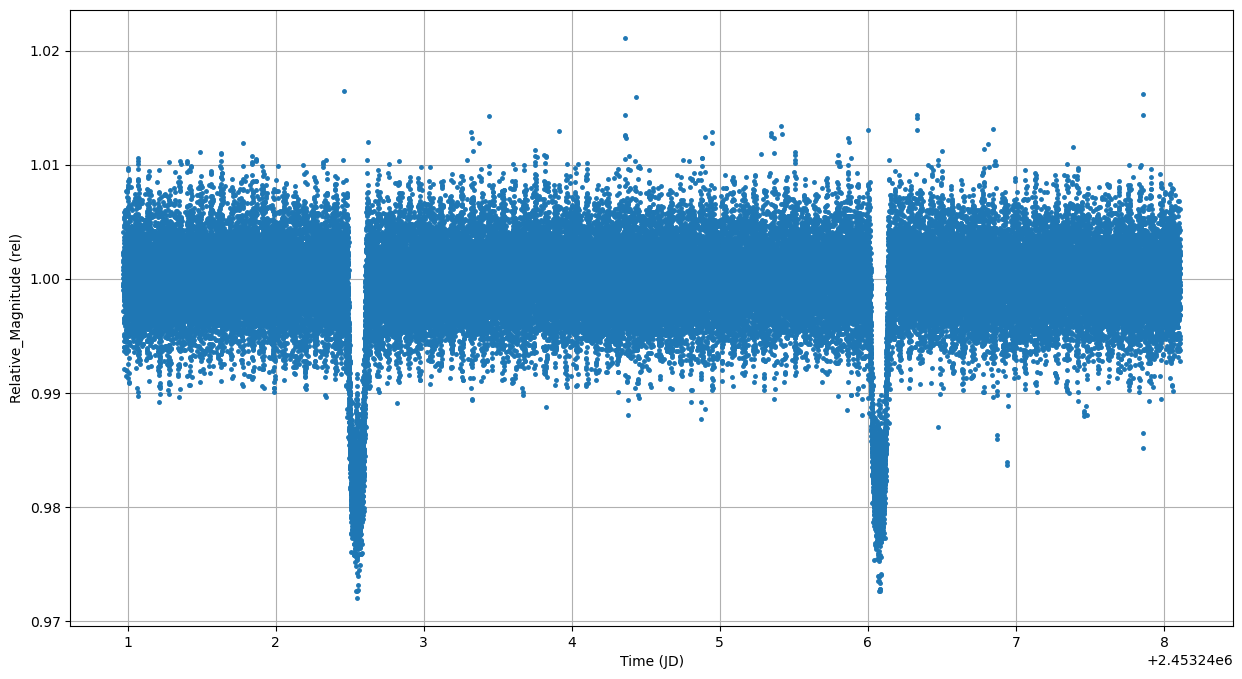

In [4]:
##Plotting the data
plt.figure(figsize = (15, 8))
plt.plot(x, y, ls = ' ', marker = '.', ms = 5)
plt.xlabel("Time (JD)")
plt.ylabel("Relative_Magnitude (rel)")
plt.grid()
plt.show()

## * Looking for intrinsic frequencies of the star

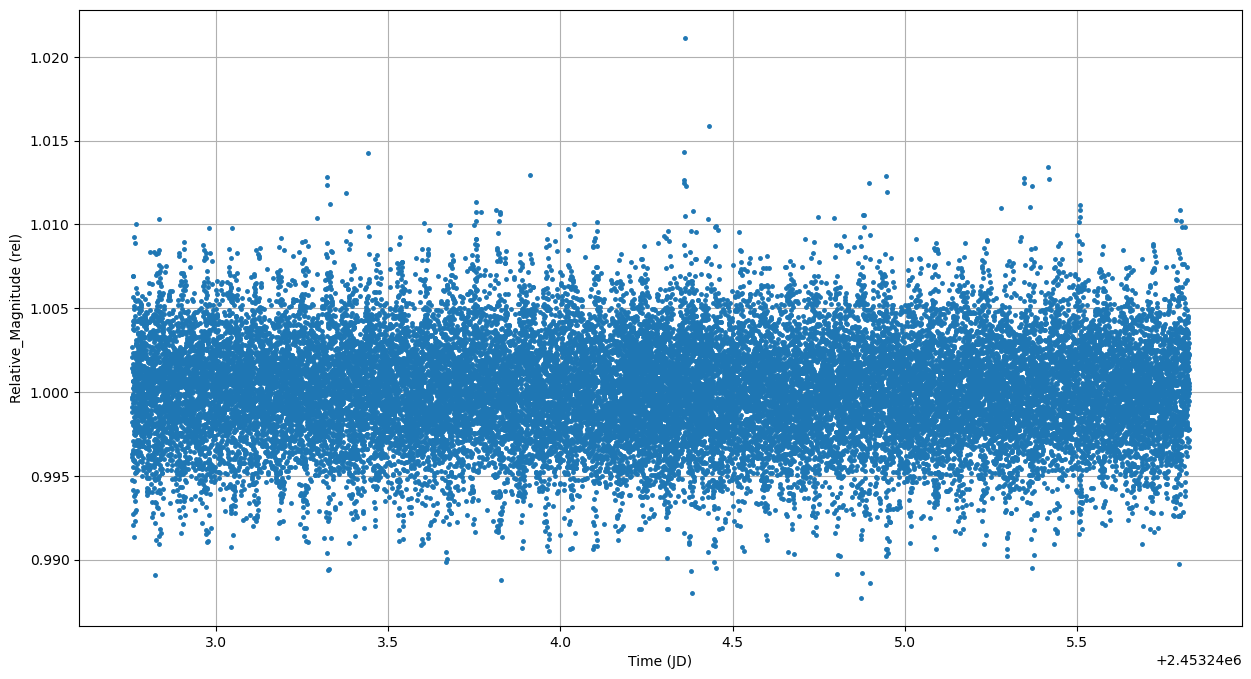

The mean is: 1.0000838481185779
The std is: 0.0030458675330933636


In [5]:
##Plotting the data
plt.figure(figsize = (15, 8))
plt.plot(x[18000:48000], y[18000:48000], ls = ' ', marker = '.', ms = 5)
plt.xlabel("Time (JD)")
plt.ylabel("Relative_Magnitude (rel)")
plt.grid()
plt.show()

mean_val = np.mean(y[18000:48000])
stand_dev = np.std(y[18000:48000])
print(f'The mean is: {mean_val}')
print(f'The std is: {stand_dev}')

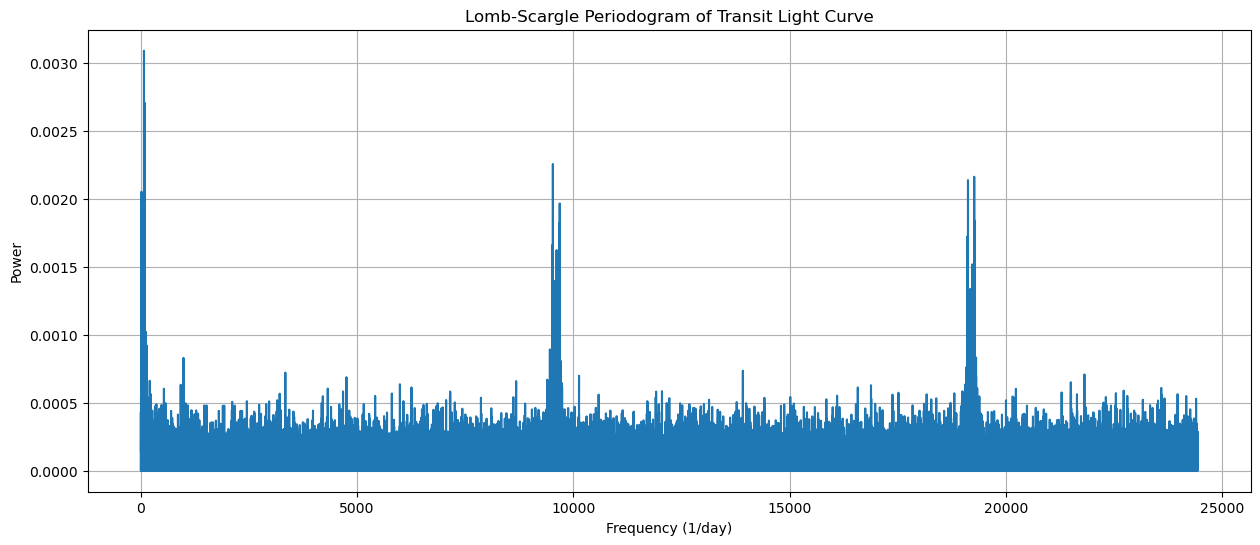

In [6]:
from astropy.timeseries import LombScargle


# Compute Lomb-Scargle periodogram
frequency, power = LombScargle(x[18000:48000], y[18000:48000]).autopower()

# Plot the periodogram
plt.figure(figsize=(15, 6))
plt.plot(frequency, power)
plt.xlabel("Frequency (1/day)")
plt.ylabel("Power")
plt.title("Lomb-Scargle Periodogram of Transit Light Curve")
plt.grid(True)
plt.show()


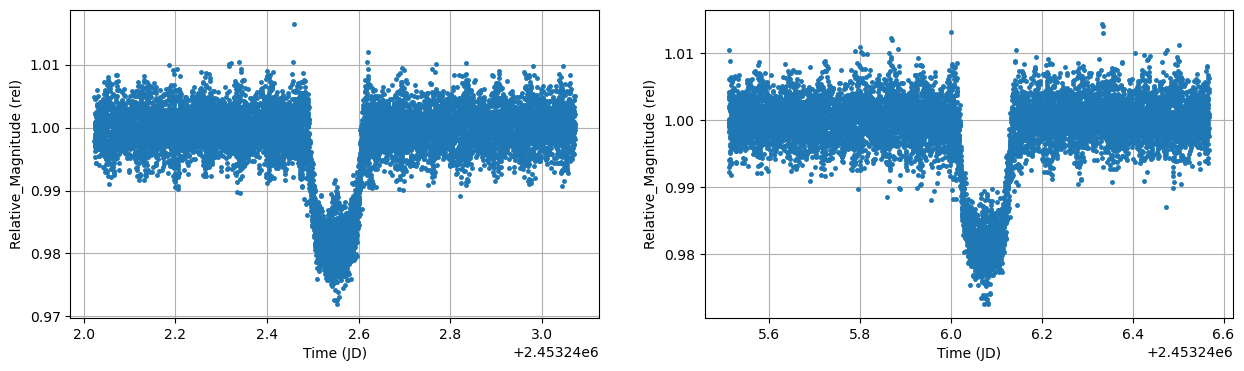

In [7]:
plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.plot(x[10000:21000], y[10000:21000], ls = ' ', marker = '.', ms = 5)
plt.xlabel("Time (JD)")
plt.ylabel("Relative_Magnitude (rel)")
plt.grid()

plt.subplot(1,2,2)
plt.plot(x[45000:55000], y[45000:55000], ls = ' ', marker = '.', ms = 5)
plt.xlabel("Time (JD)")
plt.ylabel("Relative_Magnitude (rel)")
plt.grid()
plt.show()

## * Calculation of the time period of the planet

* Polynomial fit to find the minima

In [8]:
def fit_pol(x, a, b, c, d, e):
    return a + c*(x-b)**2  + d*(x-b)**4 + e*(x-b)**6

- For the first dip

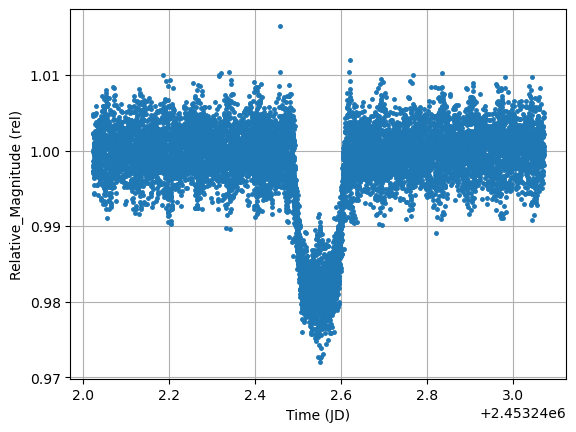

In [9]:
plt.plot(x[10000:21000], y[10000:21000], ls = ' ', marker = '.', ms = 5)
plt.xlabel("Time (JD)")
plt.ylabel("Relative_Magnitude (rel)")
plt.grid()
plt.show()

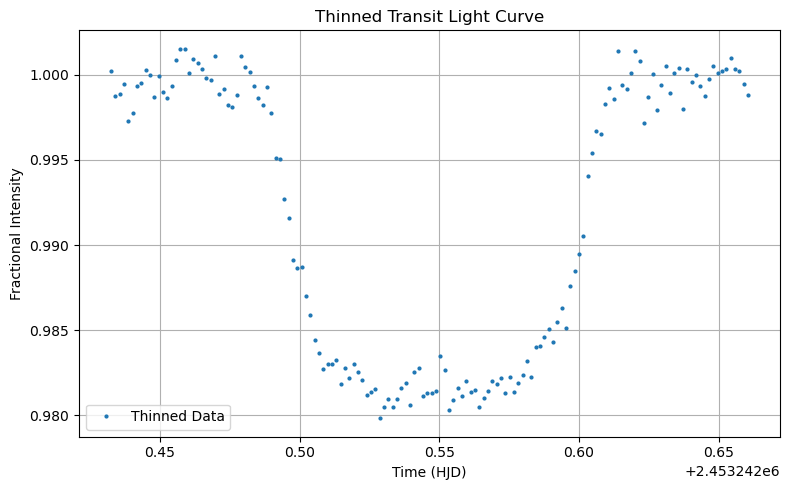

Minimum at: 2453242.528678 HJD


In [10]:
## Data Thinning
x1 = np.linspace(x[14000], x[17000], 150)
x1_cent = (x1[0:-2] + x1[1:-1]) / 2
y1 = np.zeros(len(x1_cent))
y1_err = np.zeros_like(y1)

for i in range(len(y1)):
    mask1 = (x > x1[i]) & (x < x1[i+1])
    y1[i] = np.mean(y[mask1])
    y1_err[i] = np.var(y[mask1])

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x1_cent, y1, '.', markersize=4, label='Thinned Data')
plt.xlabel("Time (HJD)")
plt.ylabel("Fractional Intensity")
plt.title("Thinned Transit Light Curve")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print minimum time
print(f"Minimum at: {x1_cent[np.argmin(y1)]:.6f} HJD")


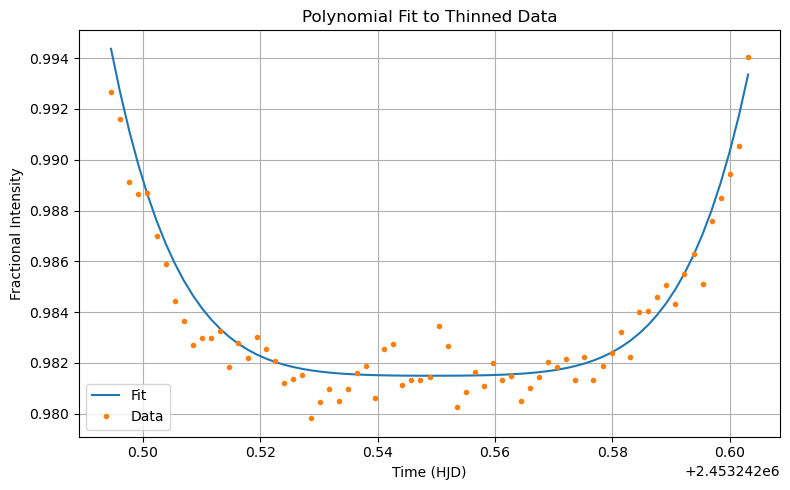

Minima is at: 2453242.549292 ± 0.000159 HJD
[9.81492944e-01 2.45324255e+06 1.97405586e-01 5.95488766e+02
 2.57648924e+05]


In [11]:
# Define mask: select points where flux < 0.995
mask = y1 < 0.995
x1_red = x1_cent[mask]
y1_red = y1[mask]

# Fit polynomial (e.g., 4th-degree with center)
p0 = [0.98, 2453242.55, 1e-1, 1e3, 1e5]                  ##These guesses are given based on the data pattern and by trying multiple guesses, the most optimized ones are found
popt1, pcov1 = sp.optimize.curve_fit(fit_pol, x1_red, y1_red, p0)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x1_red, fit_pol(x1_red, *popt1), label="Fit")
plt.plot(x1_red, y1_red, '.', label="Data")
plt.xlabel('Time (HJD)')
plt.ylabel("Fractional Intensity")
plt.title("Polynomial Fit to Thinned Data")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Extract and print transit minimum
x0_min = popt1[1]
x0_uncertainty1 = np.sqrt(pcov1[1, 1])
print(f"Minima is at: {x0_min:.6f} ± {x0_uncertainty1:.6f} HJD")
print(popt1)


- For the second dip

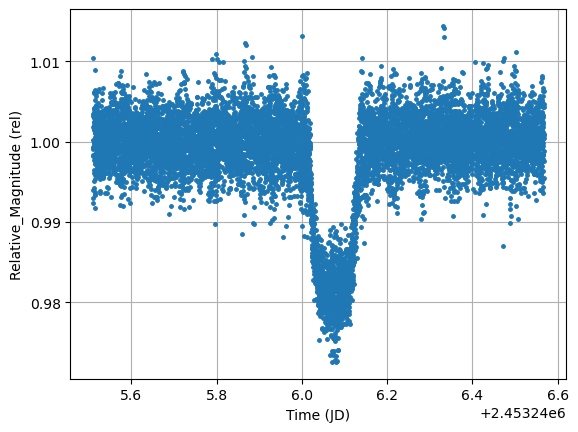

In [12]:
plt.plot(x[45000:55000], y[45000:55000], ls = ' ', marker = '.', ms = 5)
plt.xlabel("Time (JD)")
plt.ylabel("Relative_Magnitude (rel)")
plt.grid()
plt.show()

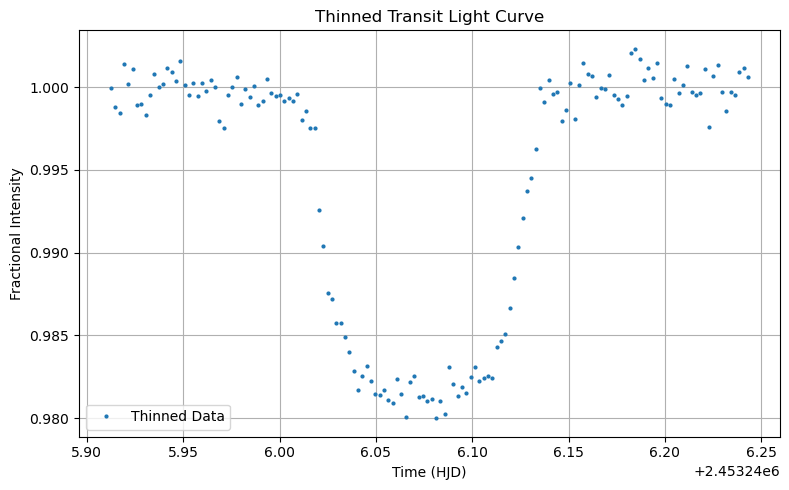

Minimum at: 2453246.081244 HJD


In [13]:
##Data Thinning
x2 = np.linspace(x[48800], x[52000], 150)
x2_cent = (x2[0:-2] + x2[1:-1])/2
y2 = np.zeros(len(x2_cent))
y2_err = np.zeros_like(y2)

for i in range(len(y2)):
    mask2 = (x > x2[i]) & (x < x2[i+1])
    y2[i] = np.mean(y[mask2])
    y2_err = np.var(y[mask2])


plt.figure(figsize=(8, 5))
plt.plot(x2_cent, y2, '.', markersize=4, label='Thinned Data')
plt.xlabel("Time (HJD)")
plt.ylabel("Fractional Intensity")
plt.title("Thinned Transit Light Curve")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Minimum at: {x2_cent[np.argmin(y2)]:.6f} HJD")


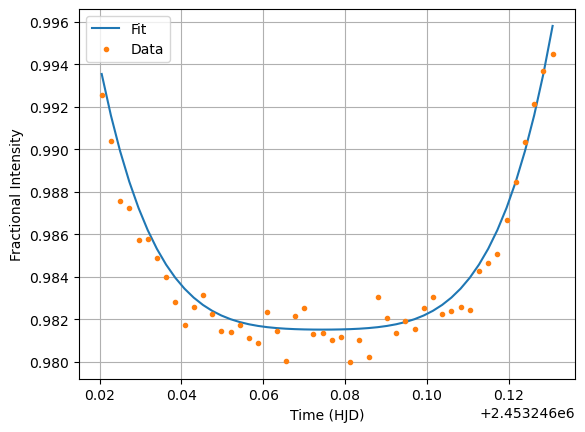

Minima is at: 2453246.074491 ± 0.000240 HJD
[9.81517674e-01 2.45324607e+06 4.49186802e-01 9.84212484e+02
 9.60108515e+04]


In [14]:
# Define mask: select points where flux < 0.995
mask = y2 < 0.995
x2_red = x2_cent[mask]
y2_red = y2[mask]

# Fit polynomial (e.g., 4th-degree with center)
p0 = [1, 2453246.0812, 1e-1, 1e3, 1e4]
popt2, pcov2 = sp.optimize.curve_fit(fit_pol, x2_red, y2_red, p0)

# Plot
plt.plot(x2_red, fit_pol(x2_red, *popt2), label="Fit")
plt.plot(x2_red, y2_red, '.', label="Data")
plt.xlabel('Time (HJD)')
plt.ylabel("Fractional Intensity")
plt.legend()
plt.grid()
plt.show()

# Extract and print transit minimum
x0_min = popt2[1]
x0_uncertainty2 = np.sqrt(pcov2[1, 1])
print(f"Minima is at: {x0_min:.6f} ± {x0_uncertainty2:.6f} HJD")
print(popt2)


### Measurement of the time period of the planet

In [15]:
T = popt2[1] - popt1[1]
err_T = x0_uncertainty1+x0_uncertainty2

print(f"The time period is: {T:0.8f} ± {err_T:0.8f} Heliocentric Days")

The time period is: 3.52519901 ± 0.00039853 Heliocentric Days


#### The time period is: `3.52519901 ± 0.00039853` Heliocentric Days

## * Calculation of the planet radius

- Measurement of the orbit radius

In [16]:
## Link: https://ui.adsabs.harvard.edu/abs/2021ApJS..255....8R/abstract
## Mass of the star is: 1.06917519587500 ± 0.04797361701205 MSun
## Radius of the star: 	1.1999759942400 ± 0.0282007051787 solar radius
## Metallicity: 0.005500315269770001 ± 0.059955548953000003 [Fe/H]

G_val = 6.6743e-11
M_sun = 1.989e30

R_orbit = ( G_val * M_sun / (4 * np.pi**2) * (3.52519901 * 86400)**2)**(1/3)
R_orbit_err = (2/3 * (0.00039853/3.52519901) + 1/3 * (0.04797361701205/1.06917519587500))*R_orbit

print(f"The radius of the orbit is: {R_orbit:0.4e} ± {R_orbit_err:0.4e} m")
print(f"In other terms, the radius of the orbit is: {R_orbit/(696340000*1.1999759942400):0.8f} ± {R_orbit_err/(696340000*1.1999759942400):0.8f} Stellar radius")

The radius of the orbit is: 6.7820e+09 ± 1.0195e+08 m
In other terms, the radius of the orbit is: 8.11642183 ± 0.12200564 Stellar radius


#### The radius of the orbit is: `6.7820e+09 ± 1.0195e+08 m`
#### In other terms, the radius of the orbit is: `8.11642183 ± 0.12200564 Stellar radius`

nan at 5352
nan at 5353
nan at 5821
nan at 6338
nan at 6339
nan at 6340


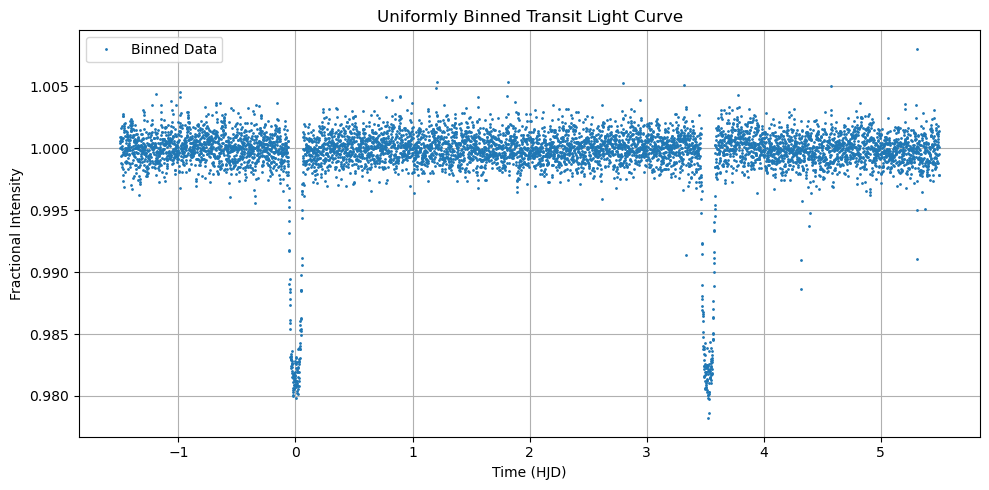

In [17]:
# Reference time: first transit minimum (HJD)
t_ref = 2453242.549292
grid_s = 0.001

# Start point chosen so that x_grid[1499] corresponds to the first transit
st_point = 2453241.050292  # t_ref - grid_s * 1499

# Create uniform time grid
x_grid = np.arange(st_point, st_point + 7000 * grid_s, grid_s)

# Initialize binned flux array
y_grid = np.zeros(len(x_grid))

# Bin and average, checking for empty slices
for i in range(len(x_grid)):
    mask_temp = (x >= (x_grid[i] - grid_s / 2)) & (x < (x_grid[i] + grid_s / 2))
    if np.any(mask_temp):
        y_grid[i] = np.mean(y[mask_temp])
    else:
        y_grid[i] = np.nan  # mark empty bins with NaN
        print(f'nan at {i}')

x_grid = x_grid - t_ref           ##Changing the reference point

plt.figure(figsize=(10, 5))
plt.plot(x_grid, y_grid, '.', markersize=2, label="Binned Data")
plt.xlabel("Time (HJD)")
plt.ylabel("Fractional Intensity")
plt.title("Uniformly Binned Transit Light Curve")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


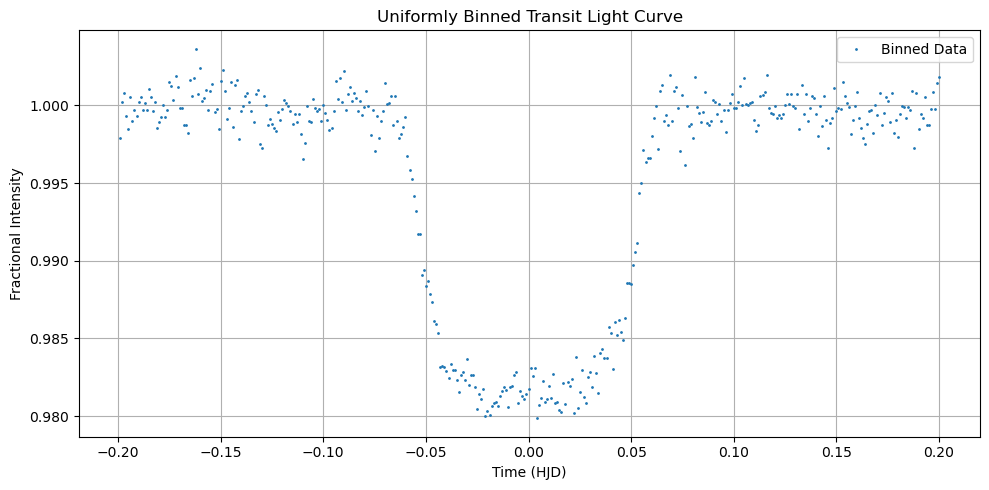

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(x_grid[1300:1700], y_grid[1300:1700], '.', markersize=2, label="Binned Data")
plt.xlabel("Time (HJD)")
plt.ylabel("Fractional Intensity")
plt.title("Uniformly Binned Transit Light Curve")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

##### Let's make the model

In [19]:
##__________________Assume the orbit is circular____________________________
## Making arrays in rotated coordinate
## The minimas are at index 1499 and 5024 (almost)
gd = 2*np.pi/(5024-1499)         ##Grid size
angles = np.arange( (-1499*gd), ((5501*gd)), gd)
x_rot = 8.11642183*np.sin(angles)
y_rot = -8.11642183*np.cos(angles)

##Rotate the coordinates
def inclined_path(x_rot, y_rot, ang):
    x_sim = x_rot
    y_sim = y_rot*np.cos(ang*np.pi/180)
    z_sim = -y_rot*np.sin(ang*np.pi/180)
    t_sim = x_grid
    return x_sim, y_sim, z_sim, t_sim

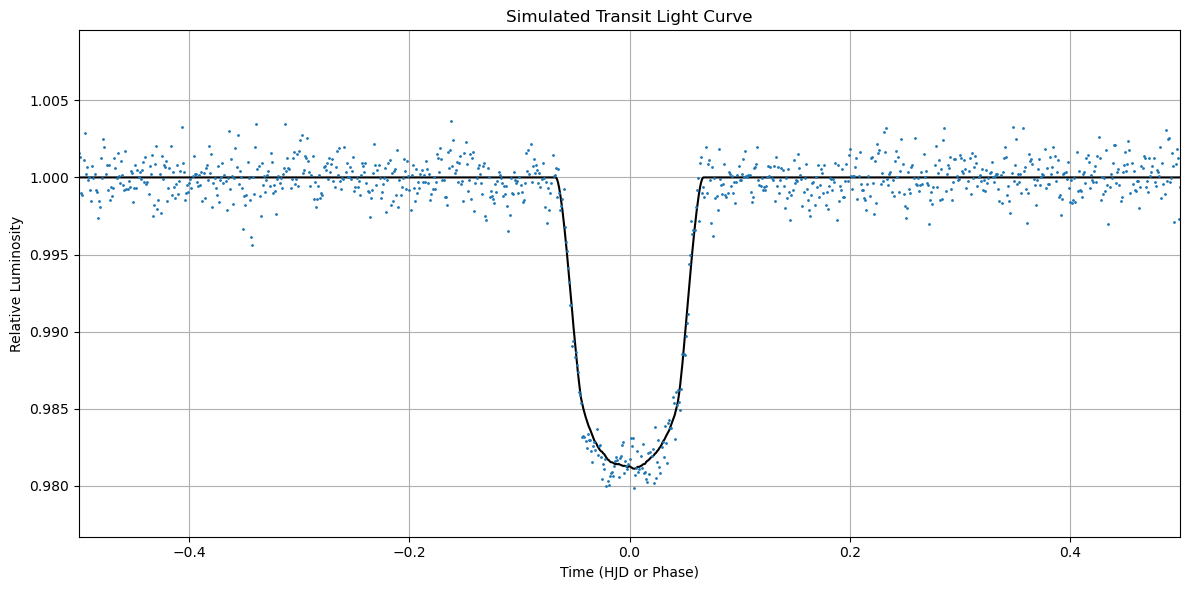

In [20]:
x_sim, y_sim, z_sim, t_sim = inclined_path(x_rot, y_rot, 85.8)

# ------------------------------
# 1. Generate points uniformly in disk
# ------------------------------
np.random.seed(42)
N_points = 2500000
r = np.sqrt(np.random.uniform(0, 1, N_points))
theta = np.random.uniform(0, 2 * np.pi, N_points)
x_star = r * np.cos(theta)
y_star = r * np.sin(theta)

# ------------------------------
# 2. Assign brightness weights using limb darkening (quadratic law)
# ------------------------------
u, v = 0.40433600, 0.29138968  # Quadratic LD coefficients (V band)
mu = np.sqrt(1 - r**2)
weights = 1 - u * (1 - mu) - v * (1 - mu)**2

# ------------------------------
# 3. Transit simulation with z > 0 condition
# ------------------------------
rp = 0.13  # planet radius in stellar radii

x_positions = x_sim
y_positions = y_sim
z_positions = z_sim
time_adjusted = t_sim

L_total = np.sum(weights)
luminosities = []

for xp, yp, zp in zip(x_positions, y_positions, z_positions):
    if zp > 0:
        r2_planet = (x_star - xp)**2 + (y_star - yp)**2
        mask_blocked = r2_planet <= rp**2
        L_blocked = np.sum(weights[mask_blocked])
        luminosities.append(1 - L_blocked / L_total)
    else:
        # No dimming when planet is behind the star
        luminosities.append(1.0)

# ------------------------------
# 4. Plotting the light curve
# ------------------------------
plt.figure(figsize=(12, 6))
plt.plot(time_adjusted, luminosities, color='k')
plt.plot(x_grid, y_grid, '.', markersize=2, label="Binned Data")
plt.xlabel("Time (HJD or Phase)")
plt.ylabel("Relative Luminosity")
plt.title("Simulated Transit Light Curve")
plt.grid(True)
plt.xlim(-0.5, 0.5)
plt.tight_layout()
plt.show()


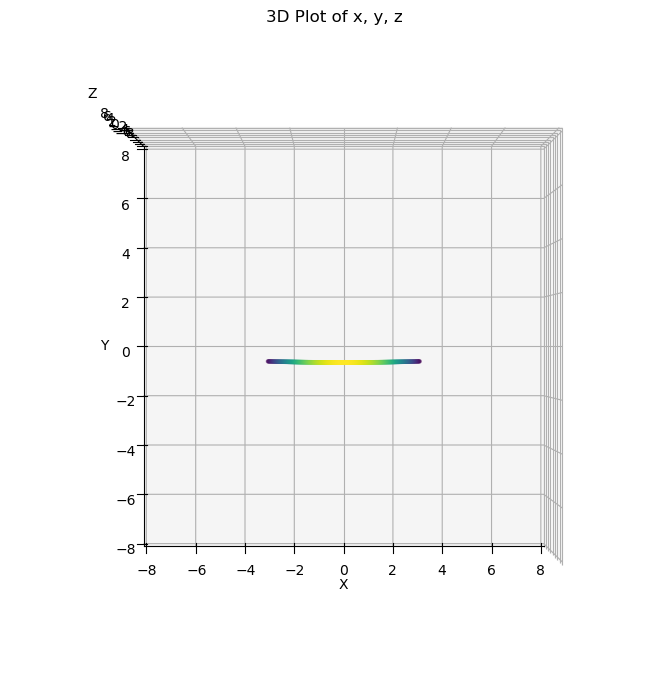

In [21]:
##View of the path
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x_sim[1300:1700], y_sim[1300:1700], z_sim[1300:1700], c=z_sim[1300:1700], cmap='viridis', s=5)

# Labels and title
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Plot of x, y, z")

# Set view: looking down the Z-axis (xy-plane view)
ax.view_init(elev=90, azim=-90)

# Enforce equal aspect ratio manually
x_range = np.ptp(x_sim)  # Peak-to-peak (max - min)
y_range = np.ptp(y_sim)
z_range = np.ptp(z_sim)
max_range = max(x_range, y_range, z_range)

x_middle = 0.5 * (np.max(x_sim) + np.min(x_sim))
y_middle = 0.5 * (np.max(y_sim) + np.min(y_sim))
z_middle = 0.5 * (np.max(z_sim) + np.min(z_sim))

ax.set_xlim(x_middle - max_range/2, x_middle + max_range/2)
ax.set_ylim(y_middle - max_range/2, y_middle + max_range/2)
ax.set_zlim(z_middle - max_range/2, z_middle + max_range/2)

ax.grid(True)
plt.tight_layout()
plt.show()


##### Converting all in a single function for calculation

In [22]:
def simulate_transit_lightcurve(x_rot, y_rot, x_grid, rp, incl_deg=85.8, i_start=1300, i_end=1700, N_points=500000):
    # 1. Create inclined orbit
    def inclined_path(x_rot, y_rot, ang):
        x_sim = x_rot
        y_sim = y_rot * np.cos(np.radians(ang))
        z_sim = -y_rot * np.sin(np.radians(ang))
        t_sim = x_grid  # time grid assumed from x_grid
        return x_sim, y_sim, z_sim, t_sim

    x_sim, y_sim, z_sim, t_sim = inclined_path(x_rot, y_rot, incl_deg)

    # 2. Generate uniform points in stellar disk
    np.random.seed(42)
    r = np.sqrt(np.random.uniform(0, 1, N_points))
    theta = np.random.uniform(0, 2 * np.pi, N_points)
    x_star = r * np.cos(theta)
    y_star = r * np.sin(theta)

    # 3. Quadratic limb darkening weights
    u, v = 0.40433600, 0.29138968  # Quadratic coefficients (V band)
    mu = np.sqrt(1 - r**2)
    weights = 1 - u * (1 - mu) - v * (1 - mu)**2
    L_total = np.sum(weights)

    # 4. Slice planet path
    x_positions = x_sim[i_start:i_end]
    y_positions = y_sim[i_start:i_end]
    z_positions = z_sim[i_start:i_end]
    time_adjusted = t_sim[i_start:i_end]

    # 5. Light curve calculation with visibility condition
    luminosities = []

    for xp, yp, zp in zip(x_positions, y_positions, z_positions):
        if zp > 0:
            r2_planet = (x_star - xp)**2 + (y_star - yp)**2
            mask_blocked = r2_planet <= rp**2
            L_blocked = np.sum(weights[mask_blocked])
            luminosities.append(1 - L_blocked / L_total)
        else:
            luminosities.append(1.0)

    return time_adjusted, luminosities


- Running the so called optimization algorithm

In [23]:
## Stage 1
t1s = time.process_time()
angle1 = np.linspace(84, 88, 5)
ratio1 = np.linspace(0.125, 0.135, 10)

sqm_err = []
params_tested = []

for i in range(len(angle1)):
    for j in range(len(ratio1)):
        time_vals, flux_vals = simulate_transit_lightcurve(
        x_rot, y_rot, x_grid,
        rp=ratio1[j],
        incl_deg=angle1[i],
        i_start=1300,
        i_end=1700,
        N_points=250000
    )


        # Compute squared modulus error (sum of squared differences)
        err = np.sum((flux_vals - y_grid[1300:1700])**2)

        sqm_err.append(err)
        params_tested.append((angle1[i], ratio1[j]))

best_index = np.argmin(sqm_err)
best_angle, best_ratio = params_tested[best_index]
print('Stage 1 results:')
print(f"Best fit: inclination = {best_angle:.3f}°, radius ratio = {best_ratio:.3f}")
print(f"Minimum squared error: {sqm_err[best_index]:.6e}")
print(f"Time taken = {time.process_time() - t1s} sec")

Stage 1 results:
Best fit: inclination = 86.000°, radius ratio = 0.129
Minimum squared error: 5.068953e-04
Time taken = 8.120974 sec


In [24]:
## Stage 2
t2s = time.process_time()
angle1 = np.linspace(85.5, 86.5, 10)
ratio1 = np.linspace(0.129, 0.131, 20)  ##I already run this and got the parameter as 0.130. That's why I am taking like that despite the previous result

sqm_err = []
params_tested = []

for i in range(len(angle1)):
    for j in range(len(ratio1)):
        time_vals, flux_vals = simulate_transit_lightcurve(
        x_rot, y_rot, x_grid,
        rp=ratio1[j],
        incl_deg=angle1[i],
        i_start=1300,
        i_end=1700,
        N_points=250000
    )


        # Compute squared modulus error (sum of squared differences)
        err = np.sum((flux_vals - y_grid[1300:1700])**2)

        sqm_err.append(err)
        params_tested.append((angle1[i], ratio1[j]))

best_index = np.argmin(sqm_err)
best_angle, best_ratio = params_tested[best_index]
print('Stage 2 results:')
print(f"Best fit: inclination = {best_angle:.3f}°, radius ratio = {best_ratio:.3f}")
print(f"Minimum squared error: {sqm_err[best_index]:.6e}")
print(f"Time taken = {time.process_time() - t2s} sec")

Stage 2 results:
Best fit: inclination = 85.833°, radius ratio = 0.130
Minimum squared error: 4.678812e-04
Time taken = 33.053140000000006 sec


In [25]:
## Stage 3
t3s = time.process_time()
angle1 = np.linspace(85.75, 85.85, 10)
ratio1 = np.linspace(0.1295, 0.1305, 10)

sqm_err = []
params_tested = []

for i in range(len(angle1)):
    for j in range(len(ratio1)):
        time_vals, flux_vals = simulate_transit_lightcurve(
        x_rot, y_rot, x_grid,
        rp=ratio1[j],
        incl_deg=angle1[i],
        i_start=1300,
        i_end=1700,
        N_points=250000
    )


        # Compute squared modulus error (sum of squared differences)
        err = np.sum((flux_vals - y_grid[1300:1700])**2)

        sqm_err.append(err)
        params_tested.append((angle1[i], ratio1[j]))

best_index = np.argmin(sqm_err)
best_angle, best_ratio = params_tested[best_index]
print('Stage 3 results:')
print(f"Best fit: inclination = {best_angle:.3f}°, radius ratio = {best_ratio:.5f}")
print(f"Minimum squared error: {sqm_err[best_index]:.6e}")
print(f"Time taken = {time.process_time() - t3s} sec")

Stage 3 results:
Best fit: inclination = 85.817°, radius ratio = 0.13028
Minimum squared error: 4.659421e-04
Time taken = 15.888835999999998 sec


#### So, the angle of inclination of the orbit (assuming circular) is `85.817°`
#### The ratio of the planet radius to the star radius is `0.13028`

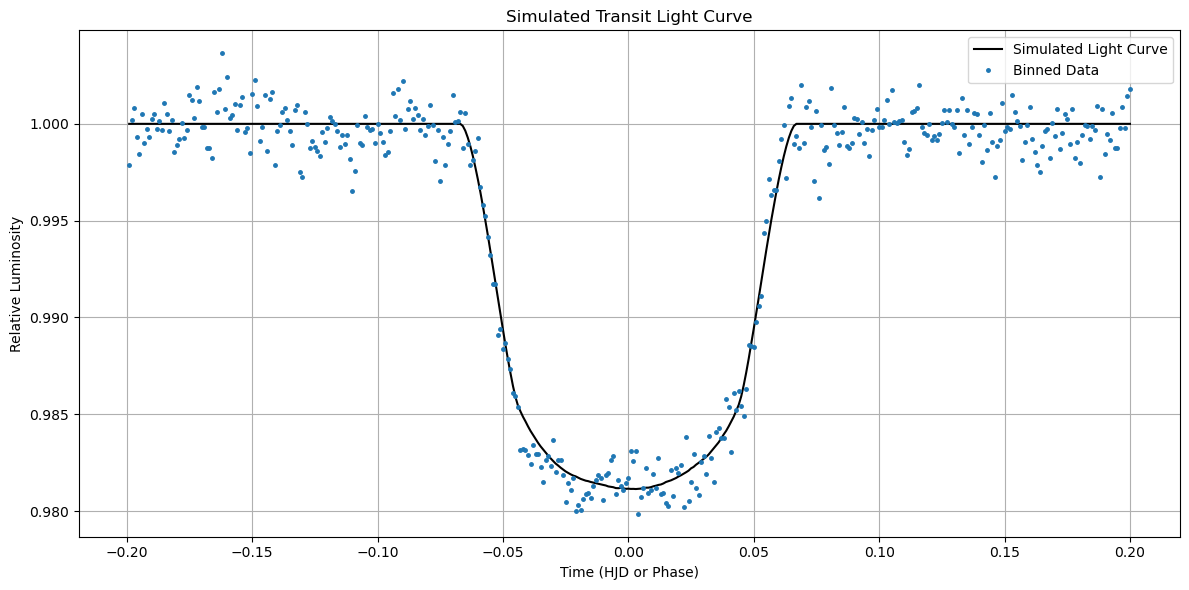

In [26]:
# Call with default number of points
time_vals, flux_vals = simulate_transit_lightcurve(x_rot, y_rot, x_grid,rp = 0.13028, incl_deg=85.817, i_start=1300, i_end=1700, N_points= 10000000)


plt.figure(figsize=(12, 6))
plt.plot(time_vals, flux_vals, 'k', label="Simulated Light Curve")
plt.plot(x_grid[1300:1700], y_grid[1300:1700], '.', markersize=5, label="Binned Data")
plt.xlabel("Time (HJD or Phase)")
plt.ylabel("Relative Luminosity")
plt.title("Simulated Transit Light Curve")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


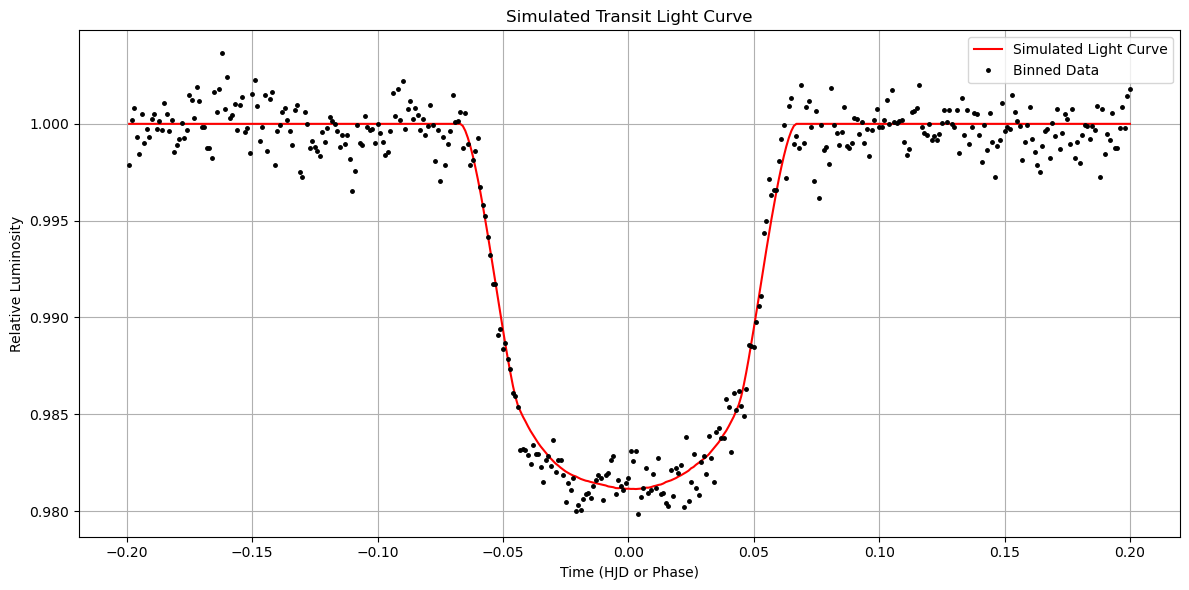

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(time_vals, flux_vals, 'r', label="Simulated Light Curve")
plt.plot(x_grid[1300:1700], y_grid[1300:1700], '.', markersize=5, label="Binned Data", color = 'k')
plt.xlabel("Time (HJD or Phase)")
plt.ylabel("Relative Luminosity")
plt.title("Simulated Transit Light Curve")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

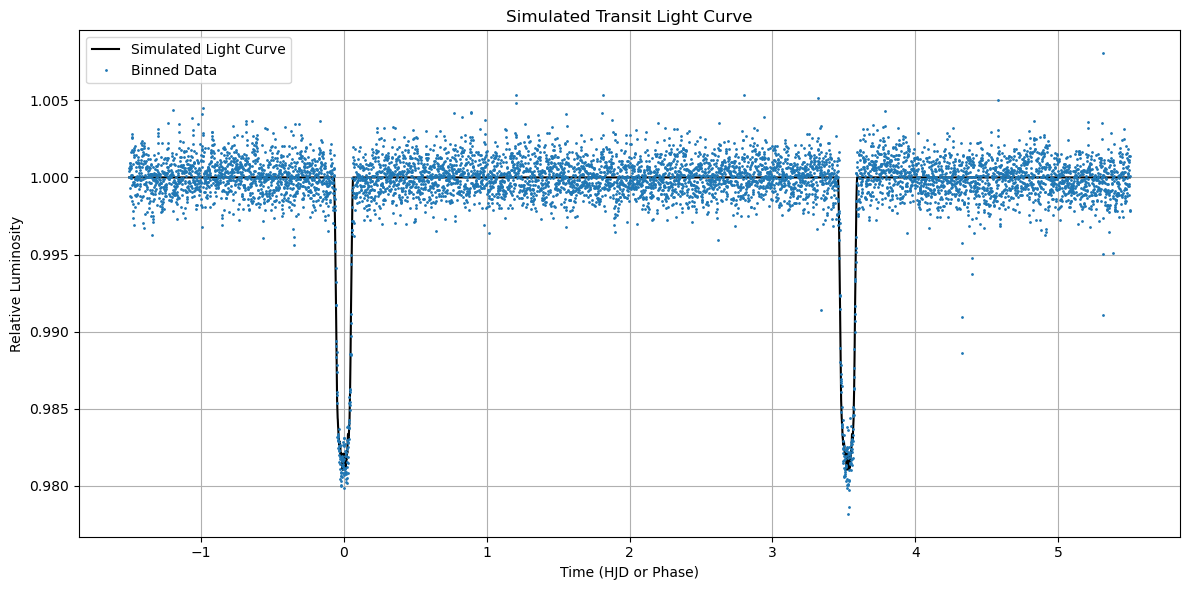

In [28]:
# Call with default number of points
time_vals, flux_vals = simulate_transit_lightcurve(x_rot, y_rot, x_grid,rp = 0.13028, incl_deg=85.817, i_start=0, i_end=-1, N_points= 100000)


plt.figure(figsize=(12, 6))
plt.plot(time_vals, flux_vals, 'k', label="Simulated Light Curve")
plt.plot(x_grid, y_grid, '.', markersize=2, label="Binned Data")
plt.xlabel("Time (HJD or Phase)")
plt.ylabel("Relative Luminosity")
plt.title("Simulated Transit Light Curve")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Results:

- The time period is: `3.52519901 ± 0.00039853 Heliocentric Days`
- The radius of the orbit is: `6.7820e+09 ± 1.0195e+08 m`
- In other terms, the radius of the orbit is: `8.11642183 ± 0.12200564 Stellar radius`
- The angle of inclination of the orbit (assuming circular) is `85.817°`
- The ratio of the planet radius to the star radius is `0.13028`
- So in other terms, the planet radius is `17.064 earth radii`. That is `1.521 jupyter radii`